# Project 3: Food Demand

Target Region: Maharashtra, India 

**Goals:**

- Gain understanding of the different factors that may influence food demand
- Estimate a relationship between diet, prices, and budget.
- Test Engel’s Law for different food items in our subject 


## Table of contents
1. [Import Data Libraries](#im)
2. [[A] Population, and Data Cleaning](#pop)
3. [[A] Estimate Demand System ](#demand)
4. [[B] Engel's Law](#eng)
5. [[B] Nutritional Content of Different Foods & Nutritional Adequacy of Diet ](#nut)

# Import Data Libraries <a name="im"></a>

In [1]:
import pandas as pd 
!pip install pyarrow

import ipywidgets
from ipywidgets import interactive, fixed, interact, Dropdown

  Using cached pyarrow-7.0.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [2]:
!pip install -r requirements.txt
import numpy as np
import sys
!pip install eep153-tools
!pip install gspread-pandas

from eep153_tools.sheets import read_sheets
import cfe

  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
Processing /home/jovyan/.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl
Missing dependencies for OracleDemands.


# [A] Population, and Data Cleaning <a name="pop"></a>

### Parquet Files Cleaning & DataFrame Establishment

We acquired our data from the Indian National Sample Survey (NSS). These original parque files contain data from a very large pool of households from 35 states; the following parts establish dataframes for our choosen Maharashtra population.

In [3]:
#food expenditure in Rupee
food_price = pd.read_parquet('x.parquet', engine = 'pyarrow').unstack('i')
food_price

total_value                                                \
i                         apple arhar (tur) baby food bajra & products banana   
j         Frequency                                                             
410001101 Monthly          20.0       121.0       NaN              NaN    NaN   
410001102 Monthly         160.0        60.0       NaN             40.0   60.0   
410001103 Monthly          40.0       195.0       NaN              NaN   50.0   
410001201 Monthly          40.0       130.0       NaN              NaN   20.0   
410001202 Monthly           NaN        65.0       NaN              NaN    NaN   
...                         ...         ...       ...              ...    ...   
799981301 Monthly           NaN         NaN       NaN              NaN    NaN   
799982101 Monthly           NaN         NaN       NaN              NaN    NaN   
799982201 Monthly           NaN         NaN       NaN              NaN    NaN   
799982202 Monthly           NaN         NaN       NaN              NaN    NaN   
799982301 Monthly           NaN         NaN       NaN              NaN    NaN   

                                                                ...        \
i                   barley & products beef beer berries  besan  ... toddy   
j         Frequency                                             ...         
410001101 Monthly                 NaN  NaN  NaN     NaN  120.0  ...   NaN   
410001102 Monthly                 NaN  NaN  NaN     NaN   15.0  ...   NaN   
410001103 Monthly                 NaN  NaN  NaN     NaN   60.0  ...   NaN   
410001201 Monthly                 NaN  NaN  NaN     NaN   90.0  ...   NaN   
410001202 Monthly                 NaN  NaN  NaN     NaN   60.0  ...   NaN   
...                               ...  ...  ...     ...    ...  ...   ...   
799981301 Monthly                 NaN  NaN  NaN     NaN    NaN  ...   NaN   
799982101 Monthly                 NaN  NaN  NaN     NaN    NaN  ...   NaN   
799982201 Monthly                 NaN  NaN  NaN     NaN    NaN  ...   NaN   
799982202 Monthly                 NaN  NaN  NaN     NaN    NaN  ...   NaN   
799982301 Monthly                 NaN  NaN  NaN     NaN    NaN  ...   NaN   

                                                                       \
i                   tomato turmeric   urd vanaspati, margarine walnut   
j         Frequency                                                     
410001101 Monthly     50.0      7.0   NaN                  NaN    NaN   
410001102 Monthly     12.0     20.0  15.0                  NaN   90.0   
410001103 Monthly     50.0     12.0   NaN                  NaN    NaN   
410001201 Monthly     36.0     33.0   NaN                  NaN  153.0   
410001202 Monthly     30.0     10.0   NaN                  NaN    NaN   
...                    ...      ...   ...                  ...    ...   
799981301 Monthly     30.0     20.0   NaN                  NaN    NaN   
799982101 Monthly     40.0     63.0  60.0                  NaN    NaN   
799982201 Monthly     30.0     63.0  60.0                  NaN    NaN   
799982202 Monthly     20.0     63.0  60.0                  NaN    NaN   
799982301 Monthly     30.0     75.0  60.0                  NaN    NaN   

                                                                               \
i                   watermelon wheat/atta - P.D.S. wheat/atta - other sources   
j         Frequency                                                             
410001101 Monthly          NaN                 NaN                      720.0   
410001102 Monthly          NaN                 NaN                      180.0   
410001103 Monthly          NaN                 NaN                      600.0   
410001201 Monthly          NaN                 NaN                      350.0   
410001202 Monthly          NaN                 NaN                      220.0   
...                        ...                 ...                        ...   
799981301 Monthly          NaN                 NaN    

In [4]:
#food quantity 
food_quant = pd.read_parquet('q.parquet', engine = 'pyarrow').unstack('i')
food_quant

total_quantity                        \
i                                      apple arhar (tur) baby food   
j         unit      Frequency                                        
410001101 Re        Monthly              NaN         NaN       NaN   
          box       Monthly              NaN         NaN       NaN   
          gm        Monthly              NaN         NaN       NaN   
          kg        Monthly            250.0      2000.0       NaN   
          litre     Monthly              NaN         NaN       NaN   
...                                      ...         ...       ...   
799982301 gm        Monthly              NaN         NaN       NaN   
          kg        Monthly              NaN         NaN       NaN   
          litre     Monthly              NaN         NaN       NaN   
          no.       Monthly              NaN         NaN       NaN   
          std. unit Monthly              NaN         NaN       NaN   

                                                                              \
i                             bajra & products banana barley & products beef   
j         unit      Frequency                                                  
410001101 Re        Monthly                NaN    NaN               NaN  NaN   
          box       Monthly                NaN    NaN               NaN  NaN   
          gm        Monthly                NaN    NaN               NaN  NaN   
          kg        Monthly                NaN    NaN               NaN  NaN   
          litre     Monthly                NaN    NaN               NaN  NaN   
...                                        ...    ...               ...  ...   
799982301 gm        Monthly                NaN    NaN               NaN  NaN   
          kg        Monthly                NaN    NaN               NaN  NaN   
          litre     Monthly                NaN    NaN               NaN  NaN   
          no.       Monthly                NaN    NaN               NaN  NaN   
          std. unit Monthly                NaN    NaN               NaN  NaN   

                                                    ...                \
i                             beer berries   besan  ... toddy  tomato   
j         unit      Frequency                       ...                 
410001101 Re        Monthly    NaN     NaN     NaN  ...   NaN     NaN   
          box       Monthly    NaN     NaN     NaN  ...   NaN     NaN   
          gm        Monthly    NaN     NaN     NaN  ...   NaN     NaN   
          kg        Monthly    NaN     NaN  2000.0  ...   NaN  5000.0   
          litre     Monthly    NaN     NaN     NaN  ...   NaN     NaN   
...                            ...     ...     ...  ...   ...     ...   
799982301 gm        Monthly    NaN     NaN     NaN  ...   NaN     NaN   
          kg        Monthly    NaN     NaN     NaN  ...   NaN  3000.0   
          litre     Monthly    NaN     NaN     NaN  ...   NaN     NaN   
          no.       Monthly    NaN     NaN     NaN  ...   NaN     NaN   
          std. unit Monthly    NaN     NaN     NaN  ...   NaN     NaN   

                                                                            \
i                             turmeric     urd vanaspati, margarine walnut   
j         unit      Frequency                                                
410001101 Re        Monthly        NaN     NaN                  NaN    NaN   
          box       Monthly        NaN     NaN                  NaN    NaN   
          gm        Monthly       50.0     NaN                  NaN    NaN   
          kg        Monthly        NaN     NaN                  NaN    NaN   
          litre     Monthly        NaN     NaN                  NaN    NaN   
...                                ...     ...                  ...    ...   
799982301 gm        Monthly      300.0     NaN                  NaN    NaN   
          kg        Monthly        NaN  1000.0                  NaN    NaN   
          litre     Monthly        NaN     NaN 

In [5]:
#nutritional content
nutritient = pd.read_parquet('n.parquet', engine = 'pyarrow')
nutritient

,calories per unit(kcal),fat per unit(gm),i,protein per unit(gm),rural,t,unit
1,3280.000000,13.00,ragi,73.00,NaN,50,kg
4,1100.000000,2.00,other cereal subs.,16.00,NaN,50,kg
5,3420.000000,36.00,maize-other sources,111.00,NaN,50,kg
7,3420.000000,36.00,maize - pds,111.00,NaN,50,kg
8,3360.000000,13.00,barley,115.00,NaN,50,kg
...,...,...,...,...,...,...,...
145,24.700001,0.95,other served processed food,0.70,0.0,68,Re
146,21.100000,0.85,"cake, pastry, prepared sweets",0.20,0.0,68,Re
147,28.500000,0.17,"biscuits, chocolates",0.35,0.0,68,Re
148,24.700001,0.95,"papad, bhujia, namkeen, mixture, chanachur",0.70,0.0,68,Re


In [6]:
# age-sex composition
pop = pd.read_parquet('z.parquet', engine = 'pyarrow')
pop

k,rural,m,religion,social group,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,...,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100
j,,,,,,,,,,,,,,,,,,,,,
410001101,Urban,Gujarat,Hinduism,Other backward class,0,0,0,0,0,2,...,0,0,0,0,0,0,1,1,0,0
410001102,Urban,Gujarat,Christianity,Others,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
410001103,Urban,Gujarat,Hinduism,Others,0,0,0,0,0,3,...,0,0,0,0,0,0,0,1,0,0
410001201,Urban,Gujarat,Christianity,Others,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
410001202,Urban,Gujarat,Hinduism,Others,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799981301,Rural,Jammu & Kashmir,Hinduism,Others,0,0,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
799982101,Rural,Jammu & Kashmir,Hinduism,Others,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
799982201,Rural,Jammu & Kashmir,Hinduism,Others,0,0,0,1,2,0,...,0,0,0,0,1,0,0,1,0,1


In [7]:
#total household expenditure in Rupee
expenditure = pd.read_parquet('total_expenditures.parquet', engine = 'pyarrow')
expenditure

,total_value
j,
410001101,7813
410001102,3573
410001103,9359
410001201,5671
410001202,6169
...,...
799981301,3842
799982101,2736
799982201,3378


In [8]:
pop.info()
pop.religion.value_counts()
#from the output, we can see that Maharashtra has the second most data points (8043 households)
#so, this would further insure the validity of our following estimation

<class 'pandas.core.frame.DataFrame'>
Index: 101662 entries, 410001101 to 799982301
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   rural           101662 non-null  object
 1   m               101662 non-null  object
 2   religion        101659 non-null  object
 3   social group    101648 non-null  object
 4   Males 0-1       101662 non-null  int64 
 5   Males 1-5       101662 non-null  int64 
 6   Males 5-10      101662 non-null  int64 
 7   Males 10-15     101662 non-null  int64 
 8   Males 15-20     101662 non-null  int64 
 9   Males 20-30     101662 non-null  int64 
 10  Males 30-50     101662 non-null  int64 
 11  Males 50-60     101662 non-null  int64 
 12  Males 60-100    101662 non-null  int64 
 13  Females 0-1     101662 non-null  int64 
 14  Females 1-5     101662 non-null  int64 
 15  Females 5-10    101662 non-null  int64 
 16  Females 10-15   101662 non-null  int64 
 17  Females 15-20   101662 

Hinduism          77062
Islam             13136
Christianity       7070
Sikhism            2016
Buddhism           1094
Others              956
Jainism             322
Zoroastrianism        3
Name: religion, dtype: int64

### **Here are some helper functions to extrapolate data for the chosen population from the larger raw dataframe**

The `filter_pop` function takes a raw dataframe and households characteristics as arguments and returns a `DataFrame` for the choosen population segement. The optional arguemnts help if you want to target specific demographic groups in the choosen state

**Input Parameters:**

- **df**: the name of the raw population df you want to extrapolate from
- **state**: an str (any state name from the 35 states)
- **rural**: optional; an str ('Rural' or 'Urban')
- **religion**: optional; an str ('Hinduism', 'Islam', 'Christianity', 'Sikhism', 'Buddhism', 'Others',             'Jainism', or 'Zoroastrianism')

In [9]:
def filter_pop(df, state, rural = None, religion = None):
    new = df.loc[df['m'] == state]
    if rural != None:
        new = new.loc[new['rural'] == rural]
    if religion != None:
        new= new.loc[new['religion'] == religion]
    return new
    

The `get_id` function takes a raw dataframe and households characteristics as arguments, uses the `filter_pop` function, and  returns a list of household IDs for the chosen population

**Input Parameters:**

- **df**: the raw df you want to extrapolate from
- **state**: an str (any state name from the 35 states)
- **rural**: optional; an str ('Rural' or 'Urban')
- **religion**: optional; an str ('Hinduism', 'Islam', 'Christianity', 'Sikhism', 'Buddhism', 'Others',             'Jainism', or 'Zoroastrianism')

In [10]:
def get_id(df, state, rural = None, religion = None):
    ids = filter_pop(df = pop, state = state, rural = rural, religion = religion).index
    return ids

The `match_info` function takes a raw dataframe and household_ids and returns a sliced df for the particular selected households

**Input Parameters:**

- **ids**: list of column ids
- **df**: the raw df you want to extrapolate from

In [11]:
def match_info(ids, df):
    n = df.reset_index()
    new = n[n['j'].isin(ids)]
    return new

# [A] Estimate Demand System <a name="demand"></a>

**Establish and format DataFrames for the chosen population: Surveyed Households from the state of Maharashtra, India**

In [12]:
maharashtra_id =get_id(df = pop, state = 'Maharashtra')
maharashtra_id

Index(['421001201', '421001202', '421001203', '421001204', '421002201',
       '421002202', '421002203', '421002204', '421011101', '421011102',
       ...
       '756982202', '756982301', '756991101', '756991102', '756991201',
       '756991202', '756991203', '756991204', '756991301', '756991302'],
      dtype='object', name='j', length=8043)

In [13]:
maha_food_quant = match_info(maharashtra_id, food_quant) 

maha_food_quant.drop('Frequency', inplace=True, axis=1) #drop unecessary column & level
maha_food_quant.droplevel(0, axis=1)

# add the time 't' and market 'm' column
#since the data is from one year (2016) and one market (maharashtra), equate all to 1
maha_food_quant['m'] = 1
maha_food_quant['t'] = 1

maha_food_quant.rename(columns = {'unit':'u'}, inplace = True) #rename & format
maha_food_quant = maha_food_quant.set_index(['j','t','m','u'])
maha_food_quant.columns.name = 'i'

maha_food_quant = maha_food_quant.apply(lambda x: pd.to_numeric(x,errors='coerce'))
maha_food_quant = maha_food_quant.replace(0,np.nan)
maha_food_quant = maha_food_quant.droplevel(0, axis=1)
maha_food_quant

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


i                        apple  arhar (tur)  baby food  bajra & products  \
j         t m u                                                            
421001201 1 1 Re           NaN          NaN        NaN               NaN   
              box          NaN          NaN        NaN               NaN   
              gm           NaN          NaN        NaN               NaN   
              kg           NaN       1000.0        NaN               NaN   
              litre        NaN          NaN        NaN               NaN   
...                        ...          ...        ...               ...   
756991302 1 1 gm           NaN          NaN        NaN               NaN   
              kg           NaN       1500.0        NaN               NaN   
              litre        NaN          NaN        NaN               NaN   
              no.          NaN          NaN        NaN               NaN   
              std. unit    NaN          NaN        NaN               NaN   

i                        banana  barley & products  beef  beer  berries  \
j         t m u                                                           
421001201 1 1 Re            NaN                NaN   NaN   NaN      NaN   
              box           NaN                NaN   NaN   NaN      NaN   
              gm            NaN                NaN   NaN   NaN      NaN   
              kg            NaN                NaN   NaN   NaN      NaN   
              litre         NaN                NaN   NaN   NaN      NaN   
...                         ...                ...   ...   ...      ...   
756991302 1 1 gm            NaN                NaN   NaN   NaN      NaN   
              kg            NaN                NaN   NaN   NaN      NaN   
              litre         NaN                NaN   NaN   NaN      NaN   
              no.           NaN                NaN   NaN   NaN      NaN   
              std. unit     NaN                NaN   NaN   NaN      NaN   

i                        besan  ...  toddy  tomato  turmeric  urd  \
j         t m u                 ...                                 
421001201 1 1 Re           NaN  ...    NaN     NaN       NaN  NaN   
              box          NaN  ...    NaN     NaN       NaN  NaN   
              gm           NaN  ...    NaN     NaN      50.0  NaN   
              kg         500.0  ...    NaN  2000.0       NaN  NaN   
              litre        NaN  ...    NaN     NaN       NaN  NaN   
...                        ...  ...    ...     ...       ...  ...   
756991302 1 1 gm           NaN  ...    NaN     NaN     150.0  NaN   
              kg           NaN  ...    NaN  3500.0       NaN  NaN   
              litre        NaN  ...    NaN     NaN       NaN  NaN   
              no.          NaN  ...    NaN     NaN       NaN  NaN   
              std. unit    NaN  ...    NaN     NaN       NaN  NaN   

i                        vanaspati, margarine  walnut  watermelon  \
j         t m u                                                     
421001201 1 1 Re                          NaN     NaN         NaN   
              box                         NaN     NaN         NaN   
              gm                          NaN     NaN         NaN   
              kg                          NaN     NaN         NaN   
              litre                       NaN     NaN         NaN   
...                                       ...     ...         ...   
756991302 1 1 gm                          NaN     NaN         NaN   
              kg                          NaN     NaN         NaN   
              litre                       NaN     NaN         NaN   
              no.                         NaN     NaN         NaN   
              std. unit                   NaN     NaN         NaN   

i                        wheat/atta - P.D.S.  wheat/atta - other sources  \
j         t m u                                                            
421001201 1 1 Re                         NaN                         NaN   
           

In [14]:
maha_tol_exp = match_info(maharashtra_id, expenditure)
maha_tol_exp

,j,total_value
7577,421001201,4857
7578,421001202,5246
7579,421001203,2725
7580,421001204,4750
7581,421002201,5207
...,...,...
78734,756991202,2497
78735,756991203,2028
78736,756991204,2833
78737,756991301,3706


In [15]:
maha_food_exp = match_info(maharashtra_id, food_price)

maha_food_exp.drop('Frequency', inplace=True, axis=1) #drop unecessary columns
maha_food_exp.columns.name = 'i'
maha_food_exp.set_index('j')
maha_food_exp = maha_food_exp.groupby('i',axis=1).sum()
maha_food_exp = maha_food_exp.replace(0,np.nan) # Replace zeros with NaN
maha_food_exp.rename(columns={maha_food_exp.columns[-1] :'j'}, inplace=True)

# add the time 't' and market 'm' column
#since the data is from one year (2016) and one market (maharashtra), equate all to 1
maha_food_exp.insert(loc=165, column='t', value=1)
maha_food_exp.insert(loc=166, column='m', value=1)

# Take logs of expenditures and name the new df 'y'
y = np.log(maha_food_exp.set_index(['j','t','m']))
y

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,,i,apple,arhar (tur),baby food,bajra & products,banana,barley & products,beef,beer,berries,besan,...,toddy,tomato,turmeric,urd,"vanaspati, margarine",walnut,watermelon,wheat/atta - P.D.S.,wheat/atta - other sources,"zarda,kimam,surti"
j,t,m,,,,,,,,,,,,,,,,,,,,,
421001201,1,1,NaN,4.317488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.401197,...,NaN,3.912023,2.484907,NaN,NaN,NaN,NaN,NaN,5.991465,NaN
421001202,1,1,NaN,4.382027,NaN,NaN,4.248495,NaN,NaN,NaN,NaN,3.401197,...,NaN,3.912023,2.484907,NaN,NaN,NaN,NaN,NaN,4.787492,NaN
421001203,1,1,NaN,NaN,NaN,NaN,2.890372,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421001204,1,1,NaN,NaN,NaN,NaN,3.555348,NaN,NaN,NaN,NaN,3.401197,...,NaN,3.912023,2.484907,NaN,NaN,NaN,NaN,NaN,6.173786,NaN
421002201,1,1,NaN,4.317488,NaN,NaN,3.555348,NaN,NaN,NaN,NaN,3.401197,...,NaN,3.912023,2.484907,NaN,NaN,NaN,NaN,NaN,5.991465,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756991202,1,1,NaN,3.401197,NaN,NaN,3.688879,NaN,NaN,NaN,2.484907,NaN,...,NaN,3.555348,2.890372,NaN,NaN,NaN,NaN,NaN,4.941642,NaN
756991203,1,1,NaN,4.700480,NaN,NaN,NaN,NaN,NaN,NaN,2.564949,NaN,...,NaN,2.484907,2.484907,NaN,NaN,NaN,NaN,3.688879,NaN,NaN
756991204,1,1,NaN,4.828314,NaN,NaN,NaN,NaN,NaN,NaN,2.708050,NaN,...,NaN,1.791759,2.890372,NaN,NaN,NaN,NaN,5.075174,NaN,NaN


In [16]:
maha_pop = match_info(maharashtra_id, pop) 
maha_pop

# add the time 't' and market 'm' column
#since the data is from one year (2016) and one market (maharashtra), equate all to 1
maha_pop['m'] = 1
maha_pop['t'] = 1
maha_pop.columns.name = 'k'
maha_pop.set_index(['j','t','m'],inplace=True)
maha_pop.drop(maha_pop.columns[0:3], inplace=True, axis=1) #drop unecessary columns

# calculate and add new column 'log Hsize'
maha_pop['log Hsize'] = np.log(maha_pop.sum(axis=1).values)
maha_pop

,,k,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,Males 30-50,Males 50-60,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100,log Hsize
j,t,m,,,,,,,,,,,,,,,,,,,
421001201,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.386294
421001202,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1.098612
421001203,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
421001204,1,1,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,1.386294
421002201,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756991202,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.693147
756991203,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.693147
756991204,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1.386294


## Estimation 
### **1.First step:**
Recall that there are two steps to estimation; the first step
involves estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$


In [17]:
result = cfe.Result(y=y,z=maha_pop)

This creates a complicated &ldquo;Result&rdquo; object, with lots of different attributes.  Note from below that attributes $y$ and $z$ are now defined.

In [18]:
result

<xarray.Result>
Dimensions:           (k: 19, j: 8043, t: 1, m: 1, i: 103)
Coordinates:
  * j                 (j) object '421001201' '421001202' ... '756991302'
  * t                 (t) int64 1
  * m                 (m) int64 1
  * i                 (i) <U50 'apple' ... 'wheat/atta - other sources'
  * k                 (k) <U14 'Males 0-1' 'Males 1-5' ... 'log Hsize'
Data variables: (12/20)
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.386 1.609 1.609
    loglambdas        object None
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.386 1.609 1.609
Attributes:
    firstround:            1
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

In [19]:
#the Result class has code to estimate the "reduced form" in one line:
result.get_reduced_form()

/opt/conda/lib/python3.9/site-packages/cfe/estimation.py:425: UserWarning: No variation in: (1, 1)
  warnings.warn("No variation in: %s" % str(constant))


After running this we can examine the estimated coefficients $\delta$:

In [20]:
result.delta.to_dataframe().unstack('k')

delta                                   \
k                          Males 0-1 Males 1-5 Males 5-10 Males 10-15   
i                                                                       
apple                       0.116241 -0.010087  -0.016225    0.042034   
arhar (tur)                -0.023166 -0.038610  -0.012056    0.004052   
bajra & products            0.252834 -0.010578   0.042047    0.071540   
banana                     -0.025035 -0.032487  -0.016979    0.010445   
besan                      -0.073333 -0.018965   0.036798    0.001278   
...                              ...       ...        ...         ...   
urd                         0.093142  0.039835   0.003065    0.024844   
vanaspati, margarine        0.166406  0.025756   0.048454    0.023660   
watermelon                  0.109513  0.093756   0.096730    0.033754   
wheat/atta - P.D.S.        -0.053065 -0.129640  -0.060660   -0.009596   
wheat/atta - other sources -0.091201 -0.073899  -0.066786    0.006375   

                                                                            \
k                          Males 15-20 Males 20-30 Males 30-50 Males 50-60   
i                                                                            
apple                         0.025789    0.072390    0.185028    0.152401   
arhar (tur)                   0.023918    0.061794    0.095395    0.091041   
bajra & products              0.075980    0.164270    0.045495    0.089150   
banana                        0.022264    0.067411    0.131955    0.091155   
besan                         0.024174    0.085924    0.085044    0.100227   
...                                ...         ...         ...         ...   
urd                           0.053146    0.083538    0.066379    0.026303   
vanaspati, margarine         -0.034821    0.101674    0.074322    0.152296   
watermelon                    0.091002    0.080101    0.006049    0.032390   
wheat/atta - P.D.S.           0.041966   -0.045329   -0.067712   -0.085848   
wheat/atta - other sources   -0.028890    0.013290    0.096776    0.101193   

                                                                              \
k                          Males 60-100 Females 0-1 Females 1-5 Females 5-10   
i                                                                              
apple                          0.118404   -0.162462   -0.076575    -0.019229   
arhar (tur)                    0.096935   -0.068099   -0.027607    -0.015911   
bajra & products               0.175357   -0.000809    0.069898     0.009602   
banana                         0.082210   -0.155635   -0.040476    -0.004479   
besan                          0.111893   -0.038423   -0.014972     0.017186   
...                                 ...         ...         ...          ...   
urd                            0.099115   -0.208499    0.076770     0.034536   
vanaspati, margarine           0.219197   -0.119702    0.006907    -0.001839   
watermelon                     0.097625   -0.337457    0.001415    -0.051143   
wheat/atta - P.D.S.           -0.069854    0.088620   -0.068748    -0.027994   
wheat/atta - other sources     0.056519   -0.172308   -0.099878    -0.047127   

                                                                      \
k                          Females 10-15 Females 15-20 Females 20-30   
i                                                                      
apple                          -0.009279      0.008302      0.077328   
arhar (tur)                     0.015115      0.021287      0.019158   
bajra & products                0.132038      0.069990     -0.129314   
banana                          0.028419      0.025601      0.071600   
besan                           0.014448      0.027082      0.064938   
...                                  ...           ...           ...   
urd                             0.003487      0.084573      0.048963   
vanaspati, margarine           -0.002745      0.067961      0.138426   
wa

Also the good-time constants $a_{it}$ (this captures the effects of prices):

However, in our data, we only have data from 1 year, so the time factor is mostly irrelevant; this won't create a problem in our estimation because although we only have 1 year, the data is from a large pool of households (8043 j values)

In [21]:
result.a.to_dataframe().unstack('i')


a                                                  \
i       apple arhar (tur) bajra & products    banana    besan   
t m                                                             
1 1  4.337676    3.689784         3.436197  3.184263  2.69299   

                                                                          ...  \
i   biscuits, chocolates black pepper bread (bakery)   brinjal   cabbage  ...   
t m                                                                       ...   
1 1             3.432596     1.979749       3.462497  2.353381  2.359734  ...   

                                                                   \
i    tamarind tea : cups tea : leaf    tomato  turmeric       urd   
t m                                                                 
1 1  1.541942   4.264725    3.25763  2.524024  2.177102  2.958252   

                                                         \
i   vanaspati, margarine watermelon wheat/atta - P.D.S.   
t m                                                       
1 1              2.74631   3.310748            3.511203   

                                
i   wheat/atta - other sources  
t m                             
1 1                   4.493328  

[1 rows x 103 columns]

### 2. Second step:

The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:



In [22]:
result.get_beta(as_df=True)

i
apple                         0.451570
arhar (tur)                   0.177062
bajra & products             -0.085787
banana                        0.329504
besan                         0.171622
                                ...   
urd                           0.155062
vanaspati, margarine          0.243740
watermelon                    0.256393
wheat/atta - P.D.S.           0.057134
wheat/atta - other sources    0.116349
Name: beta, Length: 103, dtype: float64

### 3. Assessment of Fit


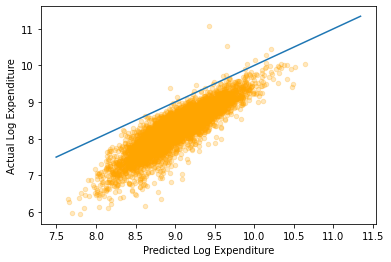

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual Log Expenditure':np.log(xbar),'Predicted Log Expenditure':np.log(xhat)})

df.plot.scatter(x='Predicted Log Expenditure',y='Actual Log Expenditure', c = "orange", alpha = 0.25)

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

In [24]:
#save estimate result in datahub
result.to_dataset('maharashtra.ds')

<xarray.Dataset>
Dimensions:           (j: 8043, i: 103, k: 19, t: 1, m: 1, kp: 19)
Coordinates:
  * j                 (j) object '421001201' '421001202' ... '756991302'
  * t                 (t) int64 1
  * m                 (m) int64 1
  * i                 (i) object 'apple' ... 'wheat/atta - other sources'
  * k                 (k) <U14 'Males 0-1' 'Males 1-5' ... 'log Hsize'
  * kp                (kp) <U14 'Males 0-1' 'Males 1-5' ... 'log Hsize'
Data variables: (12/20)
    alpha             object None
    beta              (i) float64 0.4516 0.1771 -0.08579 ... 0.05713 0.1163
    delta             (k, i) float64 0.1162 -0.02317 0.2528 ... 0.6224 0.7358
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.386 1.609 1.609
    loglambdas        (j, t, m) float64 -1.296 -1.244 nan ... 0.9579 0.2482
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              (i, t, m) float64 0.01268 0.006409 ... 0.01508 0.006408
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.386 1.609 1.609

### 4. Infer Prices


In [25]:
# Estimates most things (not counting std errors for betas).
xhat = result.get_predicted_expenditures(as_df = True) 
result.get_beta(as_df=True).sort_values(ascending=False).tail(30) # Check sanity & income elasticities 

i
groundnut                                             0.138778
chillis (green)                                       0.135773
chira                                                 0.129129
refined oil [sunflower, soyabean, saffola, etc.]      0.123606
ingredients for pan                                   0.121903
oilseeds                                              0.121774
turmeric                                              0.116570
wheat/atta - other sources                            0.116349
suji, rawa                                            0.113621
jeera                                                 0.112667
other pulses                                          0.109483
garlic                                                0.108950
cereal substitutes  (tapioca, jackfruit seed etc.)    0.106252
lpg                                                   0.103953
kerosene-pds                                          0.092297
jowar & products                                     

In [26]:
phat = xhat/maha_food_quant
# Keep kgs; g
phat = phat.xs('kg',level='u').groupby(['t','m']).median().T.dropna(how='all')
result['prices'] = phat.stack().to_xarray().to_array()
# Make this persistent...
result.to_dataset('./foo.ds')

<xarray.Dataset>
Dimensions:           (i: 103, j: 8043, k: 19, variable: 1, m: 1, t: 1, kp: 19)
Coordinates:
  * i                 (i) object 'apple' ... 'wheat/atta - other sources'
  * j                 (j) object '421001201' '421001202' ... '756991302'
  * t                 (t) int64 1
  * m                 (m) int64 1
  * k                 (k) <U14 'Males 0-1' 'Males 1-5' ... 'log Hsize'
  * kp                (kp) <U14 'Males 0-1' 'Males 1-5' ... 'log Hsize'
  * variable          (variable) int64 1
Data variables: (12/20)
    alpha             object None
    beta              (i) float64 0.4516 0.1771 -0.08579 ... 0.05713 0.1163
    delta             (k, i) float64 0.1162 -0.02317 0.2528 ... 0.6224 0.7358
    prices            (variable, i, m) float64 0.1218 0.07407 ... 0.01827
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.386 1.609 1.609
    loglambdas        (j, t, m) float64 -1.296 -1.244 nan ... 0.9579 0.2482
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              (i, t, m) float64 0.01268 0.006409 ... 0.01508 0.006408
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.386 1.609 1.609

### 5. Predicting Positive Consumption
An issue with our assessment of fit is that we *predicted* that every household would consume positive quantitites of every good, and in making our assessment we ignored the (many) cases in which in fact the household had zero expenditures on that good.  

Here we&rsquo;re going to go back and use similar framework to try and estimate the probability with which we&rsquo;ll observe zero expenditures as a function of &lambda;, prices, and household characteristics.

In [30]:
zeros_r = cfe.Result(y=(0.+(np.exp(result.y)>0)),z=result.z)
weights = zeros_r.get_predicted_log_expenditures()

# Truncate to make weights live in [0,1]
weights = weights.where((weights<1) + np.isnan(weights),1).where((weights>0) + np.isnan(weights),0)

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()

# Calculate *expected* predicted expenditures, to make unconditional on being positive
xhat = (weights*result.get_predicted_expenditures())
xsum = xhat.sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

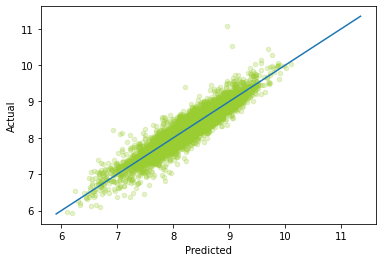

In [32]:
# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xsum)})

df.plot.scatter(x='Predicted',y='Actual', c = "yellowgreen", alpha = 0.25)

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

### 6. Predicting Quantities
Now divide predicted expenditures by predicted prices to get predicted quantities, and put back into a dataframe.

In [33]:
xx = result.get_predicted_expenditures() 
xhatdf = xx.to_dataset('i').to_dataframe()
xhatdf.columns.name ='i'

qhat = xhatdf.div(phat.T,axis=1)

qhat

i                    apple  arhar (tur)  bajra & products  banana       besan  \
t m j                                                                           
1 1 421001201  1279.221862  1840.136729       4524.110669     NaN  644.386451   
    421001202  1324.586062  1576.557158       4172.857881     NaN  593.310346   
    421001203          NaN          NaN               NaN     NaN         NaN   
    421001204  1238.294150  1785.985335       4797.219563     NaN  660.145399   
    421002201  1272.796247  1758.502814       4685.030580     NaN  641.160273   
...                    ...          ...               ...     ...         ...   
    756991202   482.729227   867.390844       3519.328137     NaN  342.130511   
    756991203   372.843649   760.291658       4704.241176     NaN  325.509417   
    756991204   245.758148  1001.372565       6172.004967     NaN  347.566563   
    756991301   596.036674  1534.535837       8080.451066     NaN  587.490013   
    756991302   781.672839  1766.669639       6130.609603     NaN  612.833169   

i              biscuits, chocolates  black pepper  bread (bakery)  \
t m j                                                               
1 1 421001201                   NaN           NaN     1122.862313   
    421001202                   NaN           NaN      965.724992   
    421001203                   NaN           NaN             NaN   
    421001204                   NaN           NaN     1028.269120   
    421002201                   NaN           NaN     1057.026024   
...                             ...           ...             ...   
    756991202                   NaN           NaN      498.410618   
    756991203                   NaN           NaN      437.984250   
    756991204                   NaN           NaN      411.647193   
    756991301                   NaN           NaN      663.262364   
    756991302                   NaN           NaN      781.107502   

i                  brinjal      cabbage  ...  tamarind  tea : cups  \
t m j                                    ...                         
1 1 421001201  1301.457465  1300.132360  ...       NaN         NaN   
    421001202  1285.825051  1256.741836  ...       NaN         NaN   
    421001203          NaN          NaN  ...       NaN         NaN   
    421001204  1322.882009  1297.239498  ...       NaN         NaN   
    421002201  1298.471519  1271.694498  ...       NaN         NaN   
...                    ...          ...  ...       ...         ...   
    756991202   621.363371   574.287612  ...       NaN         NaN   
    756991203   518.333288   428.148793  ...       NaN         NaN   
    756991204   570.372088   446.165265  ...       NaN         NaN   
    756991301  1021.176128   765.763930  ...       NaN         NaN   
    756991302  1252.560984  1068.357815  ...       NaN         NaN   

i              tea : leaf       tomato  turmeric         urd  \
t m j                                                          
1 1 421001201         NaN  2520.768588       NaN  619.794559   
    421001202         NaN  2427.257751       NaN  593.286462   
    421001203         NaN          NaN       NaN         NaN   
    421001204         NaN  2660.100171       NaN  617.425836   
    421002201         NaN  2458.419894       NaN  624.627880   
...                   ...          ...       ...         ...   
    756991202         NaN   934.942768       NaN  344.087732   
    756991203         NaN   682.330465       NaN  325.882831   
    756991204         NaN   792.669523       NaN  317.773606   
    756991301         NaN  1470.688963       NaN  519.531673   
    756991302         NaN  1957.103024       NaN  601.081447   

i              vanaspati, margarine   watermelon  wheat/atta - P.D.S.  \
t m j                                                                   
1 1 421001201            437.993380  3022.189780         12868.304114   
    421001202            390.036789  2453.509877         11100.710600   
    42100120

In [34]:
qhat.to_csv('qhat.csv')

# [B]: Engel's Law <a name="eng"></a>

In [35]:
original_xhat = result.get_predicted_expenditures(as_df = True)
original_xhat['total_food_exp'] = original_xhat.iloc[:,0:103].sum(axis=1) #calculate total food expenditure 
pop['total_household'] = pop.sum(axis=1) #calculate total household member  

short_maha_pop = filter_pop(df = pop, state= 'Maharashtra')
short_maha_pop = short_maha_pop.drop(columns = ['rural', 'm', 'religion', 'social group', 'Males 0-1', 'Males 1-5', 'Males 5-10', 'Males 10-15', 'Males 15-20', 'Males 20-30', 'Males 30-50', 'Males 50-60', 'Males 60-100','Females 0-1', 'Females 1-5', 'Females 5-10', 'Females 10-15', 'Females 15-20', 'Females 20-30', 'Females 30-50', 'Females 50-60', 'Females 60-100'])


/tmp/ipykernel_24/1260386158.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pop['total_household'] = pop.sum(axis=1) #calculate total household member


In [36]:
short_maha_pop.reset_index()
original_xhat.reset_index()
short_maha_food_exp = original_xhat.merge(short_maha_pop, left_on='j', right_on='j') #merge the household df to the expenditure df

In [37]:
# get per_capita_food_exp
short_maha_food_exp['per_capita_food_exp'] = short_maha_food_exp['total_food_exp']/short_maha_food_exp['total_household']

The `graph_engel` function takes in a food name and generate an Engel's Law graph to demonstrate the relationship between total food expenditure and expenditure on a sigle food 

**Input Parameters:**

- **food**: a string (any food name from the xhat df columns)


In [38]:
def graph_engel(food):
    y = short_maha_food_exp[f"{food}"]/short_maha_food_exp['total_household']
    x = short_maha_food_exp['per_capita_food_exp']
    plt.scatter(x, y, c = "dodgerblue", alpha = 0.25)
    plt.title(f"Engel's Law for {food}")
    plt.xlabel("Per Capita Total Food Expenditure")
    plt.ylabel("Per Capita" + f" {food}" +" Predicted Expenditure")
    plt.show()

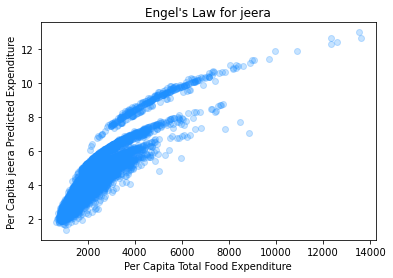

In [39]:
# testing example 
graph_engel('jeera')

Based on the predicted income elasticities of the food, we chose different food from different elasticity categories:

- dry chillies (negative elasticity, inferior good)
- bajra (negative elasticity, inferior good)
- garlic (likely inferior good)
- peas-pulses (aka dried, likely inferior good)
- peas-vegetable (aka fresh, staple food)
- potato (staple food)
- ice cream (normal good)
- cooked snacks purchased [samosa, puri, paratha,] (normal good)

In [40]:
examples = ['dry chillies','bajra & products', 'garlic', 'peas-pulses',  
            'peas-vegetables', 'potato', 'ice-cream', 
            'cooked snacks purchased [samosa, puri, paratha,']


In [41]:
#interative plot for each example 
interact(graph_engel, food = examples)

interactive(children=(Dropdown(description='food', options=('dry chillies', 'bajra & products', 'garlic', 'pea…

<function __main__.graph_engel(food)>

# [B]: Nutritional Content of Different Foods & Nutritional Adequacy of Diet <a name="nut"></a>
 
Here, we are looking at the nutritional content of the different foods, based on the recommended daily allowances we had access to from the previous project (U.S. recommended daily allowances). We are also comparing the household nutritional intake with the recommended daily intake.

In [42]:
DRI_url = "https://docs.google.com/spreadsheets/d/1y95IsQ4HKspPW3HHDtH7QMtlDA66IUsCHJLutVL-MMc/"

DRIs = read_sheets(DRI_url)

# Define *minimums*
diet_min = DRIs['diet_minimums'].set_index('Nutrition')

# Define *maximums*
diet_max = DRIs['diet_maximums'].set_index('Nutrition')

Key available for students@eep153.iam.gserviceaccount.com.


Now that we have the recommended daily allowances, we want to apply this to our data. The age ranges in our dataframes are slightly different from the age ranges in the diet_min and diet_max dataframes. For example, diet_min has daily allowances for Males from 4-8, but in our household data, we have age ranges such as Males from 1-5 and 5-10. Below, we try to solve this problem by taking averages of certain age ranges where there is varying overlap. In the end, we construct a dataframe that has the estimated recommended daily allowances for all of the age/sex ranges provided in the NSS data that we imported.

In [38]:
new_df = pd.DataFrame(index = diet_min.index)
new_df['Males 0-1'] =  diet_min['C 1-3'].to_list()
new_df['Females 0-1'] = diet_min['C 1-3'].to_list()
new_df['Males 1-5'] =  (np.array(diet_min['C 1-3']) + np.array(diet_min['M 4-8'])) / 2
new_df['Females 1-5'] =  (np.array(diet_min['C 1-3']) + np.array(diet_min['F 4-8'])) / 2
new_df['Males 5-10'] =  (np.array(diet_min['M 4-8']) + np.array(diet_min['M 9-13'])) / 2
new_df['Females 5-10'] =  (np.array(diet_min['M 4-8']) + np.array(diet_min['M 9-13'])) / 2
new_df['Males 10-15'] =  (np.array(diet_min['M 9-13']) + np.array(diet_min['M 14-18'])) / 2
new_df['Females 10-15'] =  (np.array(diet_min['F 9-13']) + np.array(diet_min['F 14-18'])) / 2
new_df['Males 15-20'] =  np.array(diet_min['M 14-18'])
new_df['Females 15-20'] =  np.array(diet_min['F 14-18'])
new_df['Males 20-30'] =  np.array(diet_min['M 19-30'])
new_df['Females 20-30'] =  np.array(diet_min['F 19-30'])
new_df['Males 31-50'] =  np.array(diet_min['M 31-50'])
new_df['Females 31-50'] =  np.array(diet_min['F 31-50'])
new_df['Males 50-60'] =  np.array(diet_min['M 51+'])
new_df['Males 60-100'] =  np.array(diet_min['M 51+'])
new_df['Females 50-60'] =  np.array(diet_min['F 51+'])
new_df['Females 60-100'] =  np.array(diet_min['F 51+'])
new_df

,Males 0-1,Females 0-1,Males 1-5,Females 1-5,Males 5-10,Females 5-10,Males 10-15,Females 10-15,Males 15-20,Females 15-20,Males 20-30,Females 20-30,Males 31-50,Females 31-50,Males 50-60,Males 60-100,Females 50-60,Females 60-100
Nutrition,,,,,,,,,,,,,,,,,,
Energy,1000.0,1000.0,1200.00,1100.00,1600.00,1600.00,2000.00,1700.00,2200.0,1800.0,2400.0,2000.0,2200.0,1800.0,2000.0,2000.0,1600.0,1600.0
Protein,13.0,13.0,16.00,16.00,26.50,26.50,43.00,40.00,52.0,46.0,56.0,46.0,56.0,46.0,56.0,56.0,46.0,46.0
"Fiber, total dietary",14.0,14.0,16.80,15.40,22.40,22.40,28.00,23.80,30.8,25.2,33.6,28.0,30.8,25.2,28.0,28.0,22.4,22.4
"Folate, DFE",150.0,150.0,175.00,175.00,250.00,250.00,350.00,350.00,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
"Calcium, Ca",700.0,700.0,850.00,850.00,1150.00,1150.00,1300.00,1300.00,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1200.0,1200.0
"Carbohydrate, by difference",130.0,130.0,130.00,130.00,130.00,130.00,130.00,130.00,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",7.0,7.0,8.50,8.50,9.00,9.00,9.50,11.50,11.0,15.0,8.0,18.0,8.0,18.0,8.0,8.0,8.0,8.0
"Magnesium, Mg",80.0,80.0,105.00,105.00,185.00,185.00,325.00,300.00,410.0,360.0,400.0,310.0,420.0,320.0,420.0,420.0,320.0,320.0
Niacin,6.0,6.0,7.00,7.00,10.00,10.00,14.00,13.00,16.0,14.0,16.0,14.0,16.0,14.0,16.0,16.0,14.0,14.0


Now that we have a dataframe detailing the recommended daily intakes with the same age/sex groups as our imported dataset, we want to do a matrix multiplication of this dataframe and z_maha_ages, which tells us how many people are in each age/sex group per household.

In [39]:
z_maha_ages = maha_pop.reset_index()
z_maha_ages = z_maha_ages.iloc[:, 3:21]
z_maha_ages.to_numpy()

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0]])

In [40]:
transposed_new_df = new_df.reset_index().drop(['Nutrition'], axis=1).T
transposed_new_df = transposed_new_df.to_numpy()

In [41]:
nutrition_by_house = z_maha_ages.dot(transposed_new_df)
nutrition_by_house.columns = diet_min.index
nutrition_by_house['Household'] = maharashtra_id
nutrition_by_house.index = nutrition_by_house['Household']
nutrition_by_house

Nutrition,Energy,Protein,"Fiber, total dietary","Folate, DFE","Calcium, Ca","Carbohydrate, by difference","Iron, Fe","Magnesium, Mg",Niacin,"Phosphorus, P",...,Riboflavin,Thiamin,"Vitamin A, RAE",Vitamin B-12,Vitamin B-6,"Vitamin C, total ascorbic acid",Vitamin E (alpha-tocopherol),Vitamin K (phylloquinone),"Zinc, Zn",Household
Household,,,,,,,,,,,,,,,,,,,,,
421001201,6200.0,128.0,86.8,1075.0,3850.0,520.0,33.0,930.0,43.0,2890.0,...,3.45,3.30,2300.0,6.45,3.90,185.0,40.5,260.0,27.5,421001201
421001202,6400.0,155.0,89.6,1150.0,3300.0,390.0,25.5,1145.0,46.0,2650.0,...,3.70,3.45,2550.0,6.90,4.15,240.0,43.0,307.5,31.5,421001202
421001203,1600.0,26.5,22.4,250.0,1150.0,130.0,9.0,185.0,10.0,875.0,...,0.75,0.75,500.0,1.50,0.80,35.0,9.0,57.5,6.5,421001203
421001204,8000.0,191.0,112.0,1550.0,4300.0,520.0,53.5,1365.0,58.0,3350.0,...,4.60,4.45,3050.0,9.30,5.45,300.0,58.0,367.5,36.5,421001204
421002201,7000.0,158.0,98.0,1300.0,4000.0,520.0,42.5,1135.0,50.0,3110.0,...,4.00,3.85,2650.0,7.80,4.65,240.0,49.0,307.5,31.5,421002201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756991202,4000.0,99.0,56.0,750.0,2300.0,260.0,17.5,745.0,30.0,1950.0,...,2.40,2.25,1650.0,4.50,2.85,150.0,28.0,187.5,20.5,756991202
756991203,3800.0,98.0,53.2,800.0,2500.0,260.0,19.0,730.0,30.0,1950.0,...,2.40,2.30,1600.0,4.80,2.80,150.0,30.0,165.0,19.0,756991203
756991204,8200.0,201.0,114.8,1550.0,4600.0,520.0,40.5,1505.0,60.0,3900.0,...,4.70,4.45,3250.0,9.30,5.35,305.0,58.0,382.5,40.5,756991204


Next, we filtered our nutrient dataset to only look at the most recent round of data collection (t=68, corresponding to 2011-2012 of the NSS data). We then merged a few dataframes we filtered to create new_df, which describes the total_quantity, calorie, fat per unit, and protein per unit intake for each food item in each household.

In [42]:
N = nutritient.loc[nutritient.t=='68',:].set_index('i').drop(columns=['rural', 't', 'unit'])
N = N.reset_index()
N = N.drop_duplicates(subset=['i'])
N

,i,calories per unit(kcal),fat per unit(gm),protein per unit(gm)
0,rice - P.D.S.,3460.00,5.00,75.00
1,rice - other sources,3460.00,5.00,75.00
2,chira,3460.00,12.00,66.00
3,"khoi, lawa",3250.00,1.00,75.00
4,muri,3250.00,1.00,75.00
...,...,...,...,...
133,ingredients for pan,6.55,0.59,0.21
134,toddy,380.00,3.00,1.00
135,country liquor,380.00,3.00,1.00
136,beer,380.00,3.00,1.00


In [43]:
q = pd.read_parquet('q.parquet', engine='pyarrow').reset_index()
q_maha = q[q['j'].isin(maharashtra_id)]
#q_maha = q_maha.drop_duplicates(subset=['i'])
q_maha

new_df = q_maha.merge(N, left_on='i', right_on='i')
new_df

,j,i,unit,Frequency,total_quantity,calories per unit(kcal),fat per unit(gm),protein per unit(gm)
0,421001201,arhar (tur),kg,Monthly,1000.0,3350.0,17.0,223.0
1,421001202,arhar (tur),kg,Monthly,1000.0,3350.0,17.0,223.0
2,421002201,arhar (tur),kg,Monthly,1000.0,3350.0,17.0,223.0
3,421002202,arhar (tur),kg,Monthly,1000.0,3350.0,17.0,223.0
4,421002203,arhar (tur),kg,Monthly,1000.0,3350.0,17.0,223.0
...,...,...,...,...,...,...,...,...
331365,756361201,barley & products,kg,Monthly,2000.0,3360.0,13.0,115.0
331366,756361202,barley & products,kg,Monthly,3000.0,3360.0,13.0,115.0
331367,756361203,barley & products,kg,Monthly,2000.0,3360.0,13.0,115.0
331368,756361204,barley & products,kg,Monthly,4000.0,3360.0,13.0,115.0


Here, we imported a csv file that include FDC IDs we found for each of the food items in our dataset.

In [44]:
fdc_codes = pd.read_csv('proj_3_fdc_codes.csv').set_index('Item')
fdc_codes = fdc_codes.reset_index()

In [45]:
#this is the final dataframe
new_df_codes = new_df.merge(fdc_codes, left_on='i', right_on='Item')
new_df_codes['unit'] = ['g'] * len(new_df_codes)
new_df_codes

,j,i,unit,Frequency,total_quantity,calories per unit(kcal),fat per unit(gm),protein per unit(gm),Item,ID
0,421001201,arhar (tur),g,Monthly,1000.0,3350.0,17.0,223.0,arhar (tur),1977550
1,421001202,arhar (tur),g,Monthly,1000.0,3350.0,17.0,223.0,arhar (tur),1977550
2,421002201,arhar (tur),g,Monthly,1000.0,3350.0,17.0,223.0,arhar (tur),1977550
3,421002202,arhar (tur),g,Monthly,1000.0,3350.0,17.0,223.0,arhar (tur),1977550
4,421002203,arhar (tur),g,Monthly,1000.0,3350.0,17.0,223.0,arhar (tur),1977550
...,...,...,...,...,...,...,...,...,...,...
233493,756361201,barley & products,g,Monthly,2000.0,3360.0,13.0,115.0,barley & products,2072684
233494,756361202,barley & products,g,Monthly,3000.0,3360.0,13.0,115.0,barley & products,2072684
233495,756361203,barley & products,g,Monthly,2000.0,3360.0,13.0,115.0,barley & products,2072684
233496,756361204,barley & products,g,Monthly,4000.0,3360.0,13.0,115.0,barley & products,2072684


In [46]:
food_items = N['i'].sort_values(ascending=True)
q_1000 = pd.DataFrame()
q_1000['i'] = food_items
q_1000['q'] = [1000]*len(food_items)
q_1000 = q_1000.reset_index().drop(['index'], axis=1)
q_1000 = q_1000[q_1000['i'].isin(fdc_codes['Item'])]
q_1000 = fdc_codes.merge(q_1000, left_on = 'Item', right_on = 'i' )
q_1000

,Item,ID,i,q
0,apple,1102644,apple,1000
1,arhar (tur),1977550,arhar (tur),1000
2,baby food,1102843,baby food,1000
3,bajra & products,1799770,bajra & products,1000
4,banana,1102653,banana,1000
...,...,...,...,...
80,urd,1898206,urd,1000
81,"vanaspati, margarine",1103828,"vanaspati, margarine",1000
82,walnut,2118446,walnut,1000
83,watermelon,1102698,watermelon,1000


In [47]:
fdc_codes = fdc_codes[fdc_codes['Item'].isin(q_1000['i'])]
fdc_codes

,Item,ID
0,apple,1102644
1,arhar (tur),1977550
2,baby food,1102843
3,bajra & products,1799770
4,banana,1102653
...,...,...
90,urd,1898206
91,"vanaspati, margarine",1103828
92,walnut,2118446
93,watermelon,1102698


After matching all of the food items across the different dataframes for uniformity, we ran the following cell to produce a dataframe that has the nutritional content of each food item we're looking at. We will use the information in this dataframe to map the nutrientients to the predicted consumption per household, qhat. 

In [48]:
import fooddatacentral as fdc
apikey = 'CDXgPa1HVqJab8EFllem1ikOF75m2ELYwziKtICr'
D = {}
count = 0
for food in q_1000.i.tolist():
    try:
        FDC = q_1000.loc[q_1000.i==food,:].ID[count]
        count+=1
        print(FDC)
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float).fillna(0)

D

1102644
1977550
1102843
1799770
1102653
2072684
2038522
547462
1102699
2091506
170931
1100621
2024758
171314
1103343
1103193
1100517
1103345
2029648
170497
1100523
1103857
1100522
422335
1104484
1919204
1155520
1102631
170922
168570
2216557
2121048
1103354
1103844
1937534
175304
168448
1102665
1100536
1750348
1102666
1942595
1103956
1607231
174687
1915741
2058624
1102655
1103366
1886719
2008520
1102668
1102594
2091229
2155640
1102670
172420
508611
1909132
1100404
172337
598232
1103364
1102597
1103153
169926
170419
1103686
1102688
168287
1103374
1144812
2129576
2077766
2031743
1126152
1102697
561783
1103276
172231
1898206
1103828
2118446
1102698
522973


,apple,arhar (tur),baby food,bajra & products,banana,barley & products,beef,beer,berries,besan,...,"suji, rawa",tamarind,toddy,tomato,turmeric,urd,"vanaspati, margarine",walnut,watermelon,wheat/atta - other sources
Alanine,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.33,0.0,0.00,0.0,0.00,0.0
"Alcohol, ethyl",0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0
Amino acids,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0
Arginine,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.54,0.0,0.00,0.0,0.00,0.0
Ash,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,7.08,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0
Vitamin K (phylloquinone),2.20,0.0,0.40,0.0,0.50,0.0,0.0,0.0,7.30,0.0,...,0.0,2.8,0.0,7.90,13.40,0.0,101.30,0.0,0.10,0.0
Vitamins and Other Components,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0
Water,85.56,0.0,82.10,0.0,74.91,0.0,0.0,0.0,88.93,0.0,...,0.0,31.4,0.0,94.52,12.85,0.0,37.58,0.0,91.45,0.0


In [135]:
food_list = qhat.columns.values.tolist()
d_list = D.columns.values.tolist()

#cross filter and match the two dfs; replace NaN values with 0 
final_q = qhat.filter(items=d_list).replace(np.nan,0)/30 #convert monthly predicted intak to daily 
final_d = D.filter(items=food_list).replace(np.nan,0)

Below, predicted_consumption shows nutritional content mapped to each household.

In [136]:
predicted_consumption = final_q@final_d.T 
predicted_consumption

Alanine  Alcohol, ethyl  Amino acids    Arginine         Ash  \
t m j                                                                           
1 1 421001201  36.535100             0.0          0.0  135.684709  216.678193   
    421001202  30.633055             0.0          0.0  131.496218  200.705723   
    421001203   0.000000             0.0          0.0    0.000000    0.000000   
    421001204  33.721344             0.0          0.0  134.185935  204.408984   
    421002201  33.899246             0.0          0.0  130.658442  205.059762   
...                  ...             ...          ...         ...         ...   
    756991202  16.700813             0.0          0.0   61.118263   94.200028   
    756991203  14.374527             0.0          0.0   50.805302   79.703840   
    756991204  15.168937             0.0          0.0   56.449140   82.072721   
    756991301  23.491333             0.0          0.0   88.867892  133.005919   
    756991302  28.954558             0.0          0.0  110.592773  165.808526   

               Aspartic acid  Beta-sitostanol  Beta-sitosterol     Betaine  \
t m j                                                                        
1 1 421001201      94.564400       426.290455     14538.848338  505.904643   
    421001202      79.928233       328.905466     11217.484762  550.261978   
    421001203       0.000000         0.000000         0.000000    0.000000   
    421001204      87.067603       456.107117     15555.760444  530.997007   
    421002201      87.702233       436.010458     14870.353889  503.749415   
...                      ...              ...              ...         ...   
    756991202      43.900674       235.606372      8035.472699  223.858563   
    756991203      37.876841       245.374795      8368.629614  180.369985   
    756991204      40.576162       209.638969      7149.841470  209.218269   
    756991301      62.136230       593.866146     20254.100779  335.936795   
    756991302      75.843433       520.787389     17761.713346  421.379927   

               Brassicasterol  ...  Vitamin D (D2 + D3), International Units  \
t m j                          ...                                             
1 1 421001201             0.0  ...                                       0.0   
    421001202             0.0  ...                                       0.0   
    421001203             0.0  ...                                       0.0   
    421001204             0.0  ...                                       0.0   
    421002201             0.0  ...                                       0.0   
...                       ...  ...                                       ...   
    756991202             0.0  ...                                       0.0   
    756991203             0.0  ...                                       0.0   
    756991204             0.0  ...                                       0.0   
    756991301             0.0  ...                                       0.0   
    756991302             0.0  ...                                       0.0   

               Vitamin D3 (cholecalciferol)  Vitamin E (alpha-tocopherol)  \
t m j                                                                       
1 1 421001201                           0.0                   2886.821028   
    421001202                           0.0                   2385.483568   
    421001203                           0.0                      0.000000   
    421001204                           0.0                   2932.688476   
    421002201                           0.0                   2879.494388   
...                                     ...                           ...   
    756991202                           0.0                   1482.779731   
    756991203                           0.0                   1472.633502   
    756991204                           0.0                   1302.422637   
    756991301                           0.0                 

Finally, we created a dataframe, comparison, that compares the nutritional content mapped to each household (predicted_consumption) with the recommended daily nutritional intake per household (nutrient_by_house). We included a column in the dataframe that compares these values, comparison, that takes the sum of all of the nutrients per household. Negative values in this column indicate that the households are malnourished/taking in less than the recommended daily allowances. 

In [137]:
nutrition_by_house_filtered = nutrition_by_house.filter(items=predicted_consumption).replace(np.nan,0)
predicted_consumption_filtered = predicted_consumption.filter(items=nutrition_by_house).replace(np.nan,0)

In [138]:
predicted_consumption_filtered = predicted_consumption_filtered.reset_index().drop(['t', 'm'], axis= 1)
predicted_consumption_filtered = predicted_consumption_filtered.rename({'j':'Household'}, axis=1)
predicted_consumption_filtered = predicted_consumption_filtered.set_index('Household')

In [140]:
predicted_consumption_filtered = predicted_consumption_filtered.sort_index(axis=1, ascending=False)
nutrition_by_house_filtered = nutrition_by_house_filtered.sort_index(axis=1, ascending=False)

In [141]:
comparison = predicted_consumption_filtered - nutrition_by_house_filtered
comparison['Sum'] = comparison.sum(axis=1)

In [143]:
negative_values = comparison[comparison['Sum'] < 0]
negative_values

,"Zinc, Zn",Vitamin K (phylloquinone),Vitamin E (alpha-tocopherol),"Vitamin C, total ascorbic acid",Vitamin B-6,Vitamin B-12,"Vitamin A, RAE",Thiamin,Riboflavin,Protein,...,"Phosphorus, P",Niacin,"Magnesium, Mg","Iron, Fe","Folate, DFE","Fiber, total dietary",Energy,"Carbohydrate, by difference","Calcium, Ca",Sum
Household,,,,,,,,,,,,,,,,,,,,,
421001203,-6.5,-57.5,-9.0,-35.0,-0.80,-1.50,-500.0,-0.75,-0.75,-26.5,...,-875.0,-10.0,-185.0,-9.0,-250.0,-22.4,-1600.0,-130.0,-1150.0,-9019.7
421011101,-6.5,-57.5,-9.0,-35.0,-0.80,-1.50,-500.0,-0.75,-0.75,-26.5,...,-875.0,-10.0,-185.0,-9.0,-250.0,-22.4,-1600.0,-130.0,-1150.0,-9019.7
421031205,-8.0,-90.0,-15.0,-75.0,-1.50,-2.40,-700.0,-1.10,-1.10,-46.0,...,-700.0,-14.0,-320.0,-8.0,-400.0,-22.4,-1600.0,-130.0,-1200.0,-10034.5
421071201,-9.5,-67.5,-13.0,-60.0,-1.15,-2.10,-750.0,-1.05,-1.10,-43.0,...,-1250.0,-14.0,-325.0,-9.5,-350.0,-28.0,-2000.0,-130.0,-1300.0,-10954.9
421111204,-13.0,-115.0,-18.0,-70.0,-1.60,-3.00,-1000.0,-1.50,-1.50,-53.0,...,-1750.0,-20.0,-370.0,-18.0,-500.0,-44.8,-3200.0,-260.0,-2300.0,-18039.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756842301,-8.5,-67.5,-13.0,-55.0,-1.10,-2.10,-650.0,-0.95,-0.95,-40.0,...,-1250.0,-13.0,-300.0,-11.5,-350.0,-23.8,-1700.0,-130.0,-1300.0,-10517.4
756911301,-4.0,-42.5,-6.5,-20.0,-0.55,-1.05,-350.0,-0.55,-0.55,-16.0,...,-480.0,-7.0,-105.0,-8.5,-175.0,-15.4,-1100.0,-130.0,-850.0,-6712.6
756911302,-11.0,-120.0,-15.0,-90.0,-1.30,-2.40,-900.0,-1.20,-1.30,-56.0,...,-700.0,-16.0,-420.0,-8.0,-400.0,-30.8,-2200.0,-130.0,-1000.0,-10803.0


Based our computations above, we found that 3.18% of the households in Maharashtra are malnourished relative to the recommended daily nutritional intake.

In [144]:
#proportion of households not getting enough nutrients:
len(negative_values)/len(comparison) * 100

3.1828919557379085